In [ ]:
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_medgemma_4b = pd.read_pickle('./02.LLMs Results/01.medgemma-4b-it/_Results.pickle')
df_biomistral_dare_7b = pd.read_pickle('./02.LLMs Results/02.BioMistral DARE 7B/_Results.pickle')
df_mediphi_instruct = pd.read_pickle('./02.LLMs Results/03.MediPhi-Instruct/_Results.pickle')
df_openbiollm_8b = pd.read_pickle('./02.LLMs Results/04.OpenBioLLM-8B/_Results.pickle')
df_JSL_MedLlama3_8B_v2 = pd.read_pickle('//02.LLMs Results/05.JSL-MedLlama 3 8B v2.0/_Results.pickle')
df_medgemma_27b = pd.read_pickle('./02.LLMs Results/06.medgemma-27b-text-it/_Results.pickle')
df_openbiollm_70b = pd.read_pickle('./02.LLMs Results/07.OpenBioLLM-70B/_Results.pickle')
df_meditron_7b = pd.read_pickle('./02.LLMs Results/08.meditron 7B/_Results.pickle')
df_medgemma_4b_FT = pd.read_pickle('./02.LLMs Results/09.medgemma-4b-it Fine Tuned/_Results.pickle')

In [59]:
df = pd.concat([df_meditron_7b,
                df_openbiollm_8b,
                df_biomistral_dare_7b,
                df_mediphi_instruct,
                df_medgemma_4b,
                df_JSL_MedLlama3_8B_v2,
                df_openbiollm_70b,
                df_medgemma_27b,
                df_medgemma_4b_FT
                ], axis=0)
df

,source_file,year,count_of_matches,total_rows,percent_correct,model_name
0,Anatomía Patológica & Patología,2018,6,31,19.35,meditron 7B
1,Anatomía Patológica & Patología,2019,6,30,20.00,meditron 7B
2,Anatomía Patológica & Patología,2020,10,50,20.00,meditron 7B
3,Anatomía Patológica & Patología,2023,5,29,17.24,meditron 7B
4,Anatomía Patológica & Patología,2024,7,37,18.92,meditron 7B
...,...,...,...,...,...,...
78,Urología,2020,67,100,67.00,medgemma-4b-it-FT
79,Urología,2022,68,100,68.00,medgemma-4b-it-FT
80,Urología,2023,76,100,76.00,medgemma-4b-it-FT
81,Urología,2024,68,100,68.00,medgemma-4b-it-FT


In [60]:
# Create a mapping dictionary
spanish_to_english = {
    'Anatomía Patológica & Patología': 'Pathological Anatomy and Pathology',
    'Anestesiología': 'Anesthesiology',
    'Cirugía General': 'General Surgery',
    'Cirugía de Tórax y Cardiovascular': 'Thoracic and Cardiovascular Surgery',
    'Ginecología y Obstetricia': 'Gynecology and Obstetrics',
    'Neurocirugía': 'Neurosurgery',
    'Oftalmología': 'Ophthalmology',
    'Pediatría': 'Pediatrics',
    'Prueba A': 'Test A',
    'Prueba B': 'Test B',
    'Psiquiatría': 'Psychiatry',
    'Radiología': 'Radiology',
    'Urología': 'Urology'
}

# Create the new column
df['source_file_eng'] = df['source_file'].map(spanish_to_english)
pd.crosstab(df['source_file'], df['source_file_eng'])

source_file_eng,Anesthesiology,General Surgery,Gynecology and Obstetrics,Neurosurgery,Ophthalmology,Pathological Anatomy and Pathology,Pediatrics,Psychiatry,Radiology,Test A,Test B,Thoracic and Cardiovascular Surgery,Urology
source_file,,,,,,,,,,,,,
Anatomía Patológica & Patología,0,0,0,0,0,54,0,0,0,0,0,0,0
Anestesiología,63,0,0,0,0,0,0,0,0,0,0,0,0
Cirugía General,0,63,0,0,0,0,0,0,0,0,0,0,0
Cirugía de Tórax y Cardiovascular,0,0,0,0,0,0,0,0,0,0,0,45,0
Ginecología y Obstetricia,0,0,63,0,0,0,0,0,0,0,0,0,0
Neurocirugía,0,0,0,36,0,0,0,0,0,0,0,0,0
Oftalmología,0,0,0,0,63,0,0,0,0,0,0,0,0
Pediatría,0,0,0,0,0,0,63,0,0,0,0,0,0
Prueba A,0,0,0,0,0,0,0,0,0,63,0,0,0


In [61]:
# df['source_file'] = df['source_file'].replace({'Patología': 'Anatomía Patológica'})   # From 'Patología' to 'Anatomía Patológica'
# df['source_file'].value_counts()

In [62]:
df['model_name'].value_counts()

model_name
meditron 7B               83
OpenBioLLM-8B             83
BioMistral-7B-DARE        83
MediPhi-Instruct 3.8B     83
medgemma-4b-it            83
JSL-MedLlama 3 8B v2.0    83
OpenBioLLM-70B            83
medgemma-27b-text-it      83
medgemma-4b-it-FT         83
Name: count, dtype: int64

In [63]:
df.groupby(['source_file', 'year'])['percent_correct'].mean().sort_values(ascending=False)

source_file                         year
Psiquiatría                        2020    65.983333
                                    2023    62.516667
                                    2025    61.971111
                                    2019    61.537778
                                    2024    60.900000
                                              ...    
Radiología                         2025    40.758889
Neurocirugía                       2025    40.423333
Oftalmología                       2018    39.517778
                                    2024    39.237778
Cirugía de Tórax y Cardiovascular  2019    38.064444
Name: percent_correct, Length: 83, dtype: float64

In [64]:
df.groupby(['source_file', 'year', 'model_name'])['percent_correct'].mean().sort_values(ascending=False)

source_file                        year  model_name          
Psiquiatría                       2025  medgemma-27b-text-it    94.00
                                   2024  OpenBioLLM-70B          92.00
Anatomía Patológica & Patología  2024  medgemma-27b-text-it    92.00
Prueba B                           2020  medgemma-27b-text-it    91.11
Prueba A                           2024  medgemma-27b-text-it    91.00
                                                                 ...  
Urología                          2022  meditron 7B             12.90
Radiología                        2025  meditron 7B             12.82
Anestesiología                    2020  meditron 7B             12.50
                                   2025  meditron 7B             12.00
Oftalmología                      2018  BioMistral-7B-DARE      11.34
Name: percent_correct, Length: 747, dtype: float64

In [65]:
df[df['model_name'] == 'medgemma-4b-it'].groupby(['source_file', 'year'])['percent_correct'].mean().sort_values(ascending=False)

source_file                         year
Psiquiatría                        2020    66.00
                                    2025    65.00
                                    2023    61.00
                                    2022    60.00
Prueba A                            2019    58.59
                                            ...  
Oftalmología                       2023    34.34
Ginecología y Obstetricia          2025    34.00
                                    2022    34.00
Urología                           2025    34.00
Cirugía de Tórax y Cardiovascular  2019    31.31
Name: percent_correct, Length: 83, dtype: float64

In [66]:
df[df['model_name'] == 'medgemma-27b-text-it'].groupby(['source_file', 'year'])['percent_correct'].mean().sort_values(ascending=False)

source_file                         year
Psiquiatría                        2025    94.00
Anatomía Patológica & Patología   2024    92.00
Prueba B                            2020    91.11
Pediatría                          2019    91.00
Prueba A                            2024    91.00
                                            ...  
Urología                           2024    72.00
Neurocirugía                       2022    71.00
Radiología                         2022    69.00
Neurocirugía                       2025    68.00
Cirugía de Tórax y Cardiovascular  2019    60.00
Name: percent_correct, Length: 83, dtype: float64

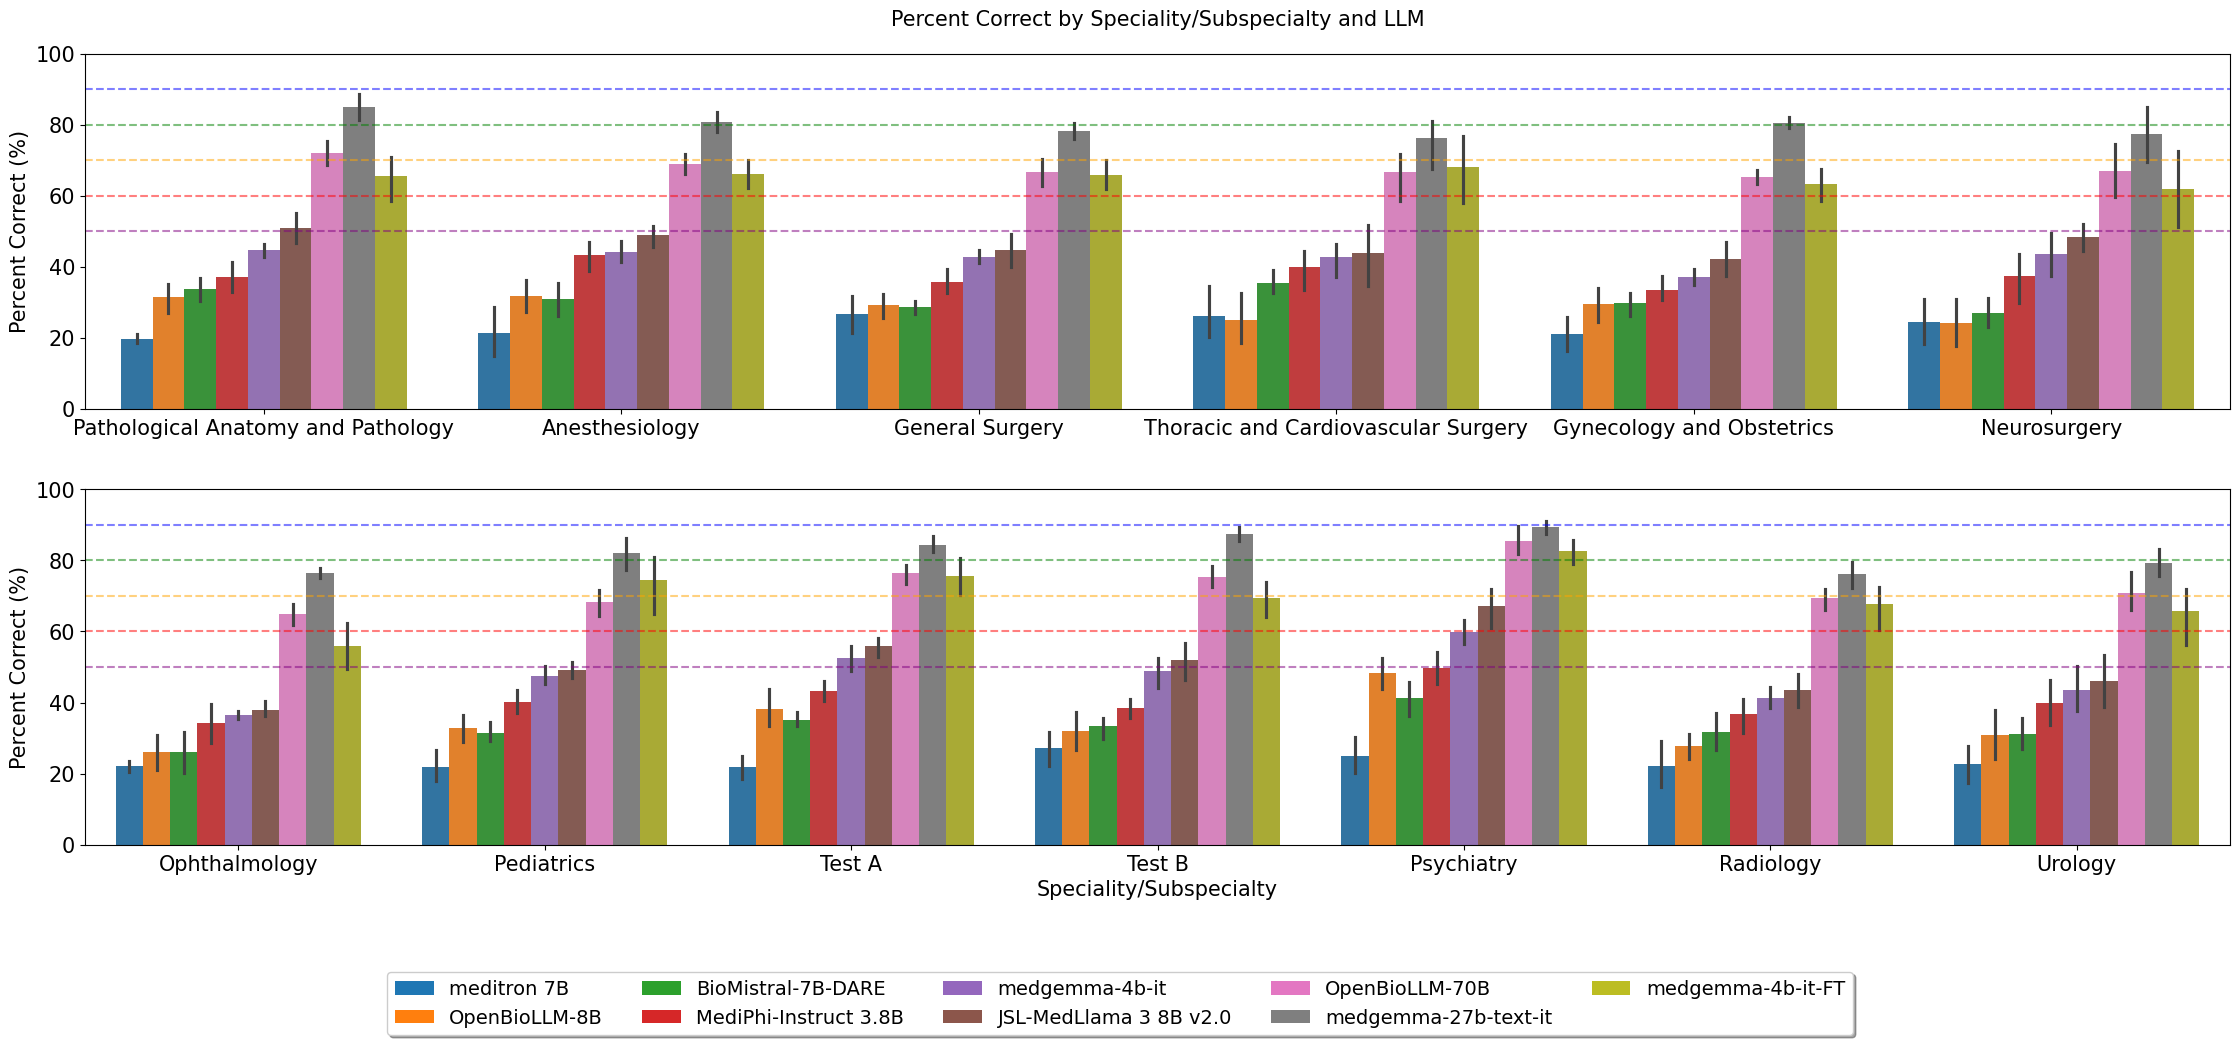

In [ ]:
# Create a figure with multiple rows and extra space for legend
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (22.5, 10))  # Increased height slightly

# Get unique source files and calculate number per row
unique_sources = df['source_file_eng'].unique()
sources_per_row = len(unique_sources) // 2

# Create masks for splitting data
mask1 = df['source_file_eng'].isin(unique_sources[:sources_per_row])
mask2 = df['source_file_eng'].isin(unique_sources[sources_per_row:])

# Plot first row - no legend
ax1 = sns.barplot(data=df[mask1],
                  x='source_file_eng',
                  y='percent_correct',
                  hue='model_name',
                  errorbar='ci',
                  ax=axes[0])
axes[0].set_title('Percent Correct by Speciality/Subspecialty and LLM', fontsize=15, pad=20)
axes[0].set_ylabel('Percent Correct (%)', fontsize=15)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_xlabel('', fontsize=15)
axes[0].set_ylim(0, 100)

# Add horizontal reference lines to first row
reference_colors = ['purple', 'red', 'orange', 'green', 'blue']
for y in [50, 60, 70, 80, 90]:
    axes[0].axhline(y=y, 
                    color=reference_colors[(y-50)//10], 
                    linestyle='--', 
                    alpha=0.5)

# Plot second row - no legend
ax2 = sns.barplot(data=df[mask2],
                  x='source_file_eng',
                  y='percent_correct',
                  hue='model_name',
                  errorbar='ci',
                  ax=axes[1])
axes[1].set_title(' ', fontsize=15, pad=20)
axes[1].set_ylabel('Percent Correct (%)', fontsize=15)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].set_xlabel('Speciality/Subspecialty', fontsize=15)
axes[1].set_ylim(0, 100)

# Add horizontal reference lines to second row
for y in [50, 60, 70, 80, 90]:
    axes[1].axhline(y=y, 
                    color=reference_colors[(y-50)//10],
                    linestyle='--', 
                    alpha=0.5)

# Remove legends from individual subplots
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)

# Get unique model names and create custom legend
unique_models = df['model_name'].unique()
colors = plt.cm.tab10(range(len(unique_models)))  # Get colors from default palette

# Create custom legend patches
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=model) 
                   for i, model in enumerate(unique_models)]

# Add the legend at the bottom in two rows
fig.legend(handles=legend_elements,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(unique_models)//2 + len(unique_models)%2,  # Arrange in 2 rows
           fontsize=14,
           frameon=True,
           fancybox=True,
           shadow=True)

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for legend

# Save the figure
from datetime import date
today = date.today()
plt.savefig(f'./04.Manuscripts/LLMs Answering Qs/Figure 1_{today}.png',
            dpi = 600,
            bbox_inches = 'tight',
            pad_inches = 0.1,
            facecolor = 'white')
plt.show()

Converting wide/MultiIndex to long (heuristic).
Index-as-columns detected: [('model_name', '')]
Columns preview: MultiIndex([(2018,                     'Anesthesiology'),
            (2018,                    'General Surgery'),
            (2018,          'Gynecology and Obstetrics'),
            (2018,                      'Ophthalmology'),
            (2018, 'Pathological Anatomy and Pathology'),
            (2018,                         'Pediatrics'),
            (2018,                         'Psychiatry'),
            (2018,                          'Radiology'),
            (2018,                             'Test A'),
            (2018,                             'Test B')],
           names=['year', 'source_file_eng'])
=== tidy sample ===
             model year                        source_file  value
BioMistral-7B-DARE 2018                     Anesthesiology  20.41
BioMistral-7B-DARE 2018                    General Surgery  25.00
BioMistral-7B-DARE 2018          Gynecolog

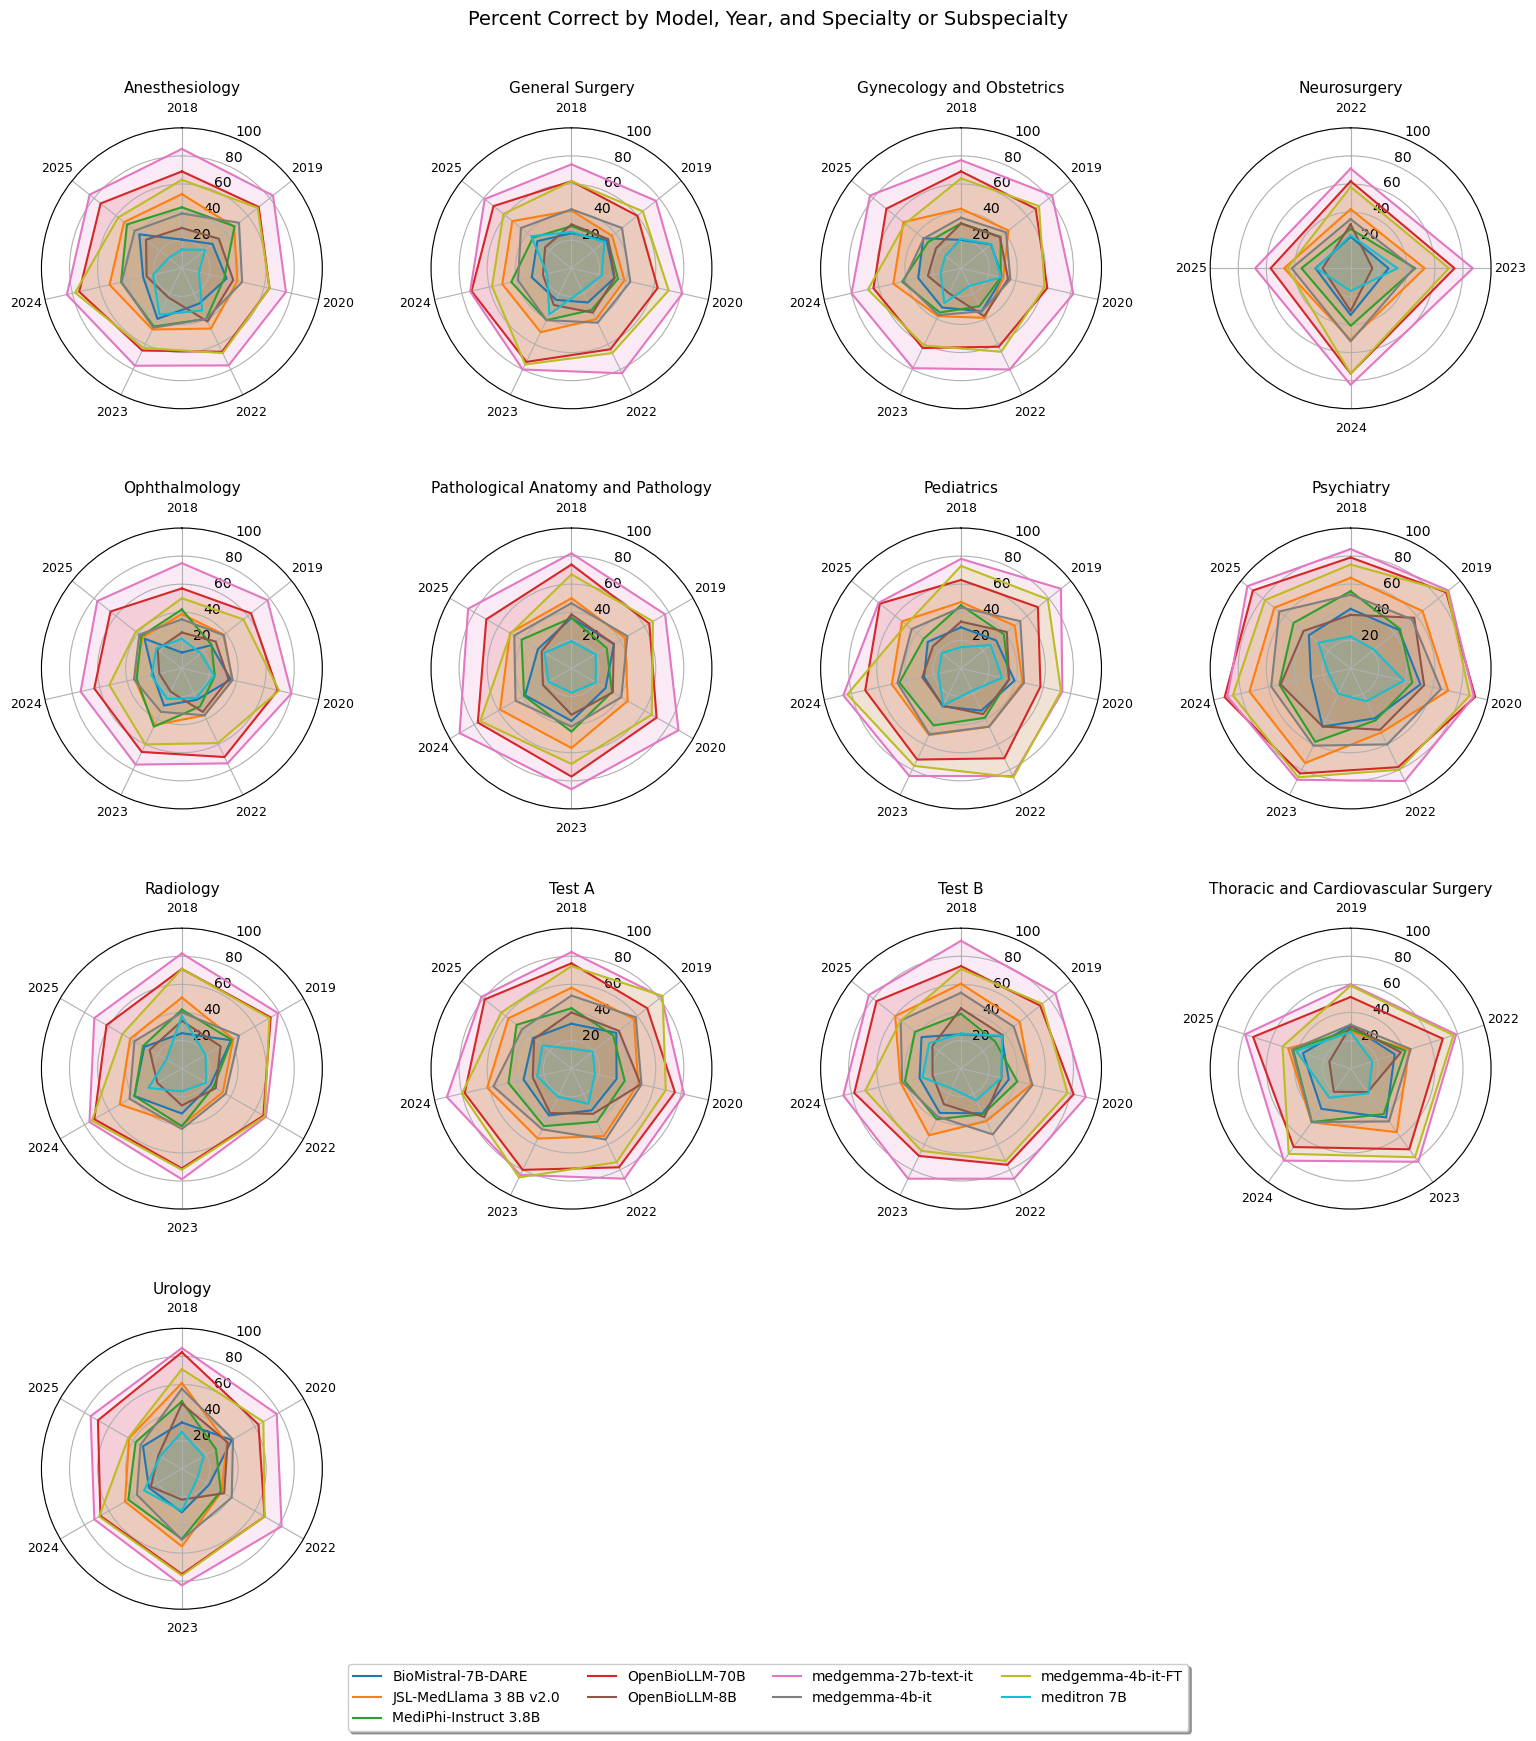

,model,year,source_file,value
0,BioMistral-7B-DARE,2018,Anesthesiology,20.41
1,BioMistral-7B-DARE,2018,General Surgery,25.00
2,BioMistral-7B-DARE,2018,Gynecology and Obstetrics,20.20
3,BioMistral-7B-DARE,2018,Ophthalmology,11.34
4,BioMistral-7B-DARE,2018,Pathological Anatomy and Pathology,36.00
...,...,...,...,...
742,meditron 7B,2025,Radiology,12.82
743,meditron 7B,2025,Test A,26.47
744,meditron 7B,2025,Test B,29.03
745,meditron 7B,2025,Thoracic and Cardiovascular Surgery,40.62


In [ ]:


pivot_data = df.pivot_table(index='model_name', columns=['year', 'source_file_eng'], values='percent_correct')
pivot_data


def create_faceted_spider_chart_auto(data, title="", debug=True,
                                     value_col_hint=None, max_cols_per_row=4,
                                     figsize_per_plot=(4, 4), fill_alpha=0.15):
    """
    Flexible function that accepts many common input shapes and produces
    faceted radar plots by source_file, with years as axis labels.
    Modified to have a single legend that doesn't overlap plots.

    - data: pandas DataFrame (tidy or wide/pivot)
    - debug: prints detected layout and a tiny sample for troubleshooting
    """
    df = data.copy()

    # --- 1) Reset index so index values become columns (safer processing) ---
    df_reset = df.reset_index()
    # Columns that came from the index are those not present in the original columns
    index_cols = [c for c in df_reset.columns if c not in df.columns]

    # --- 2) Heuristics to find model, year, source and value columns ---
    # Find a model column (likely in index_cols or in df_reset)
    model_col = None
    for c in index_cols + list(df_reset.columns):
        if 'model' in str(c).lower():
            model_col = c
            break

    # Find source_file column (look for 'source' or 'file' in names)
    source_col = None
    for c in df_reset.columns:
        if 'source' in str(c).lower() or 'file' in str(c).lower():
            source_col = c
            break

    # YEAR detection helper: tests if a label looks like a year (e.g., 2019, '2020')
    def looks_like_year(x):
        try:
            s = str(x)
            return bool(re.match(r'^\d{4}$', s)) and (1900 <= int(s) <= 2100)
        except Exception:
            return False

    # If the DataFrame is already tidy long (has year & value-like columns), try to detect them
    year_col = None
    value_col = None

    # Candidate year columns: any column whose values are year-like (many matches)
    for c in df_reset.columns:
        vals = df_reset[c].dropna().astype(str).head(50)
        if len(vals) and vals.apply(looks_like_year).mean() > 0.6:
            year_col = c
            break

    # Candidate value column: numeric columns that are not model/year/source
    numeric_cols = [c for c in df_reset.columns if pd.api.types.is_numeric_dtype(df_reset[c])]
    for c in numeric_cols:
        if c not in (model_col, source_col, year_col):
            value_col = c
            break

    # If not yet found, try to interpret wide / pivot forms (including MultiIndex columns)
    # We'll build a long-format list of records by iterating columns if needed.
    records = []
    if year_col and value_col and source_col and model_col:
        # Looks tidy already.
        if debug:
            print("Detected tidy (long) format with columns:")
            print(f"  model_col: {model_col}, year_col: {year_col}, source_col: {source_col}, value_col: {value_col}")
        long_df = df_reset.rename(columns={
            model_col: 'model',
            year_col: 'year',
            source_col: 'source_file',
            value_col: 'value'
        })[['model', 'year', 'source_file', 'value']].copy()
    else:
        # We will convert wide/pivot to long by enumerating column labels.
        if debug:
            print("Converting wide/MultiIndex to long (heuristic).")
            print("Index-as-columns detected:", index_cols)
            print("Columns preview:", df.columns[:10])

        # For MultiIndex columns, columns are tuples; else single-level
        col_tuples = []
        for c in df.columns:
            if isinstance(c, tuple):
                col_tuples.append(tuple(c))
            else:
                col_tuples.append((c,))  # unify to tuple shape

        # Determine which tuple element looks most like year (by frequency)
        nlevels = max(len(t) for t in col_tuples)
        level_scores = []
        for lvl in range(nlevels):
            vals = []
            for t in col_tuples:
                if lvl < len(t):
                    vals.append(str(t[lvl]))
            if not vals:
                level_scores.append(0)
                continue
            frac_year = np.mean([looks_like_year(v) for v in vals])
            level_scores.append(frac_year)
        # Choose year_level as max frac_year if reasonably high, else None
        year_level = int(np.argmax(level_scores)) if max(level_scores) > 0.1 else None

        # For each column tuple, extract year_val and source_val (remainder joined)
        df_rows = df_reset.to_dict(orient='records')  # list of row dicts representing index cols + columns
        columns_list = list(df.columns)  # original col keys (could be tuples)
        for col in columns_list:
            t = col if isinstance(col, tuple) else (col,)
            # get year
            year_val = None
            if year_level is not None and year_level < len(t) and looks_like_year(t[year_level]):
                year_val = str(t[year_level])
            else:
                # fallback: find any element in tuple that looks like year
                for el in t:
                    if looks_like_year(el):
                        year_val = str(el)
                        break

            # source is the tuple parts other than the year part
            source_parts = [str(x) for i, x in enumerate(t) if i != year_level or year_level is None]
            source_val = " - ".join([p for p in source_parts if p is not None and p != ''])
            if source_val == "":
                source_val = None

        # The above approach needs row positions to pull values from df efficiently.
        # Let's do it more directly: iterate rows by position using iloc and iterate columns by position.
        records = []
        n_rows = df.shape[0]
        for i in range(n_rows):
            # get index data (after reset)
            idx_row = df_reset.iloc[i]
            index_info = {c: idx_row[c] for c in index_cols}
            for j, col in enumerate(columns_list):
                t = col if isinstance(col, tuple) else (col,)
                # year extraction (again)
                year_val = None
                if year_level is not None and year_level < len(t) and looks_like_year(t[year_level]):
                    year_val = str(t[year_level])
                else:
                    for el in t:
                        if looks_like_year(el):
                            year_val = str(el)
                            break
                source_parts = [str(x) for k, x in enumerate(t) if not (year_level is not None and k == year_level)]
                source_val = " - ".join([p for p in source_parts if p is not None and p != ''])
                if source_val == "":
                    source_val = None

                # get value from original df by iloc
                val = df.iloc[i, j]
                rec = index_info.copy()
                rec.update({'year': year_val, 'source_file': source_val, 'value': val})
                records.append(rec)

        long_df = pd.DataFrame.from_records(records)
        # attempt to detect model_col now
        if not model_col:
            # guess: any index col might be the model, choose the first index col
            model_col = index_cols[0] if index_cols else None
        if model_col:
            long_df = long_df.rename(columns={model_col: 'model'})
        else:
            # fabricate model names from row number if none available
            long_df['model'] = ['row_' + str(i) for i in range(len(long_df))]

    # Final cleanup: ensure columns names exist and correct types
    long_df = long_df[['model', 'year', 'source_file', 'value']].copy()
    # Normalize year to string
    long_df['year'] = long_df['year'].astype(str)
    # If source_file is None, replace with 'ALL'
    long_df['source_file'] = long_df['source_file'].fillna('ALL')

    if debug:
        print("=== tidy sample ===")
        print(long_df.head(8).to_string(index=False))
        print("Detected unique source_files:", long_df['source_file'].nunique(),
              "examples:", long_df['source_file'].unique()[:8])
        print("Detected unique years:", sorted(long_df['year'].unique())[:12])

    # --- 3) Plotting: one radar per source_file ---
    source_files = sorted(long_df['source_file'].unique())
    n_files = len(source_files)
    if n_files == 0:
        raise ValueError("No source_file values detected in the transformed data.")

    n_cols = min(max_cols_per_row, n_files)
    n_rows = math.ceil(n_files / n_cols)
    fig_width = n_cols * figsize_per_plot[0]
    fig_height = n_rows * figsize_per_plot[1] + 2  # Extra space for legend
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(fig_width, fig_height),
                             subplot_kw=dict(polar=True))
    # flatten axes list
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    # Get all unique models across all source files for consistent colors/legend
    all_models = sorted(long_df['model'].unique())
    colors = plt.cm.tab10(np.linspace(0, 1, len(all_models)))
    model_colors = dict(zip(all_models, colors))

    # Store legend handles for the shared legend
    legend_handles = []
    legend_labels = []

    for ax_idx, source in enumerate(source_files):
        ax = axes[ax_idx]
        subset = long_df[long_df['source_file'] == source]

        # categories are years sorted (convert to strings)
        categories = sorted(subset['year'].unique(), key=lambda s: int(s) if s.isdigit() else s)
        num_vars = len(categories)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]

        # Axis formatting
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=9)

        # For each model in this source_file, plot
        models = subset['model'].unique()
        for model in models:
            row_vals = subset[subset['model'] == model].set_index('year')['value'].reindex(categories)
            # convert to numeric (coerce)
            values = pd.to_numeric(row_vals, errors='coerce').fillna(0).tolist()
            values += values[:1]
            
            # Plot with consistent color
            line = ax.plot(angles, values, label=str(model), color=model_colors[model])[0]
            ax.fill(angles, values, alpha=fill_alpha, color=model_colors[model])
            
            # Collect legend info only once (from first occurrence)
            if ax_idx == 0 or (ax_idx > 0 and model not in legend_labels):
                if model not in legend_labels:
                    legend_handles.append(line)
                    legend_labels.append(str(model))

        ax.set_ylim(0, 100)
        ax.set_title(str(source), pad=25, size=11)
        # Remove individual legends
        if ax.get_legend():
            ax.get_legend().remove()

    # hide any unused axes
    for k in range(len(source_files), len(axes)):
        axes[k].axis('off')

    # Create single legend outside the plot area
    # Position it at the bottom center with reduced space
    fig.legend(legend_handles, legend_labels, 
               loc='lower center',
               bbox_to_anchor=(0.5, 0.02),  # Moved closer to plots
               ncol=min(4, len(legend_labels)),  # Max 4 columns to keep it compact
               fontsize=10,
               frameon=True,
               fancybox=True,
               shadow=True)

    fig.suptitle(title, size=14, y=0.98)
    
    # Adjust layout with increased spacing between subplots and reduced bottom margin
    plt.tight_layout(pad=3.0)  # Increased padding between subplots
    plt.subplots_adjust(bottom=0.08)  # Reduced bottom margin for legend
    today = date.today()
    plt.savefig(f'./04.Manuscripts/LLMs Answering Qs/Figure 2_{today}.png',
                dpi=600,
                bbox_inches='tight',
                pad_inches=0.1,
                facecolor='white')
    plt.show()

    return long_df  # return tidy DF for your own inspection / tests


# Example usage
# pivot_data must have columns: ['model_name', 'year1', 'year2', ..., 'source_file']
create_faceted_spider_chart_auto(pivot_data, "Percent Correct by Model, Year, and Specialty or Subspecialty")